<a href="https://colab.research.google.com/github/Leegyu66/-/blob/main/07_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [5]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


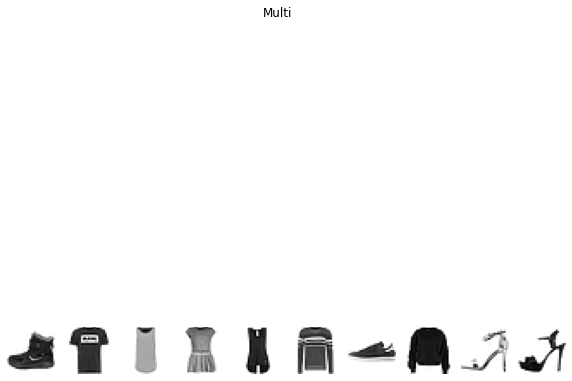

In [6]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap='gray_r')
  axs[i].axis('off')
  fig.suptitle('Multi')
plt.show()

In [7]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [8]:
import numpy as np
print(np.unique(train_target, return_counts=True)) # return_counts를 True로 하면 각각 클래스 레이블에 해당하는 정수의 갯수 표현

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [9]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

print(train_scaled.shape)

(60000, 784)


In [10]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8196000000000001


- log함수는 이진부류만 가능함
- 그러므로 하나의 클래스를 양성 나머지는 음성으로 두고 훈련하는 방식으로 함

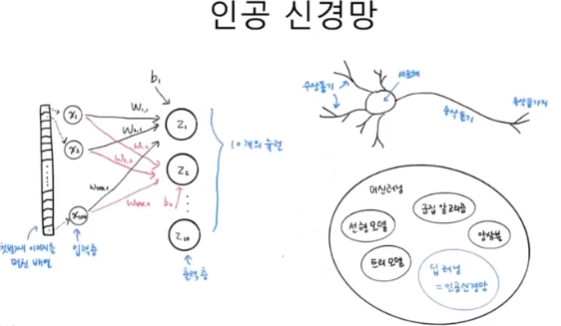

In [11]:
import tensorflow as tf

## 텐서플로우
- 딥러닝 라이브러리
- 케라스 == 텐서플로우

In [12]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [13]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [14]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


In [15]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,)) # 10개의 출력층 784개의 입력층
model = keras.Sequential(dense)

In [16]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy') # metrics='accuracy는 정확도를 출력하겠다는 뜻뜻
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [18]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 6s 2ms/step - loss: 0.6070 - accuracy: 0.7958
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4786 - accuracy: 0.8403
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4556 - accuracy: 0.8479
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4434 - accuracy: 0.8530
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4366 - accuracy: 0.8546


In [19]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.4491 - accuracy: 0.8480


[0.44910144805908203, 0.8479999899864197]